# Loan prediction classification 
<p> Simple classification project using Kaggle data set. </br>   
Classifying people in terms of decisions on granting a loan.</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict

In [3]:
df_train = pd.read_csv(r"data\loan prediction\train_data.csv")
df_test = pd.read_csv(r"data\loan prediction\test_data.csv")

In [3]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Analyzing data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#analyzing how many values are missing
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
#checking the correctness of categorical data (no typos which could add new category; no outliers; no strange categories)
def check_categorical(df):
    for col in df.columns[1:]:
        print(df[col].value_counts(), "\n")
           

In [8]:
check_categorical(df_train)

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64 

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64 

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64 

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_A

In [9]:
check_categorical(df_test)

Male      286
Female     70
Name: Gender, dtype: int64 

Yes    233
No     134
Name: Married, dtype: int64 

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64 

Graduate        283
Not Graduate     84
Name: Education, dtype: int64 

No     307
Yes     37
Name: Self_Employed, dtype: int64 

5000    6
3500    6
3333    5
7500    4
2500    4
       ..
724     1
1762    1
4243    1
4167    1
9200    1
Name: ApplicantIncome, Length: 314, dtype: int64 

0       156
700       3
2000      3
1250      2
1760      2
       ... 
1270      1
2925      1
2999      1
528       1
2393      1
Name: CoapplicantIncome, Length: 194, dtype: int64 

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: LoanAmount, Length: 144, dtype: int64 

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Lo

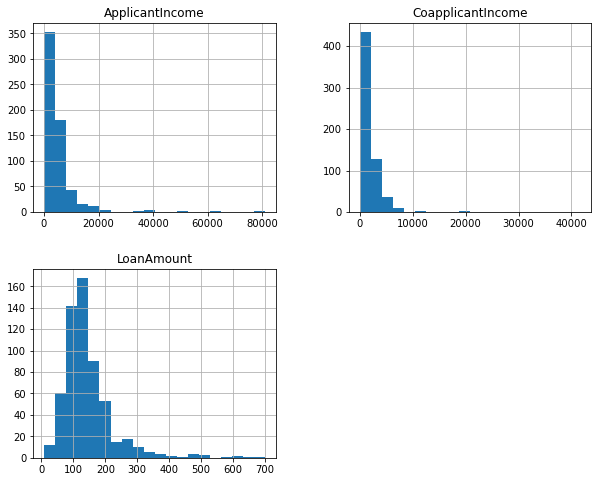

In [10]:
#visualising numerical data
df_train[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].hist(bins=20, figsize=(10,8))
plt.show()

In [11]:
#deleting useless first column
df_train_1 = df_train.drop("Loan_ID", axis=1)
df_test_1 = df_test.drop("Loan_ID", axis=1)

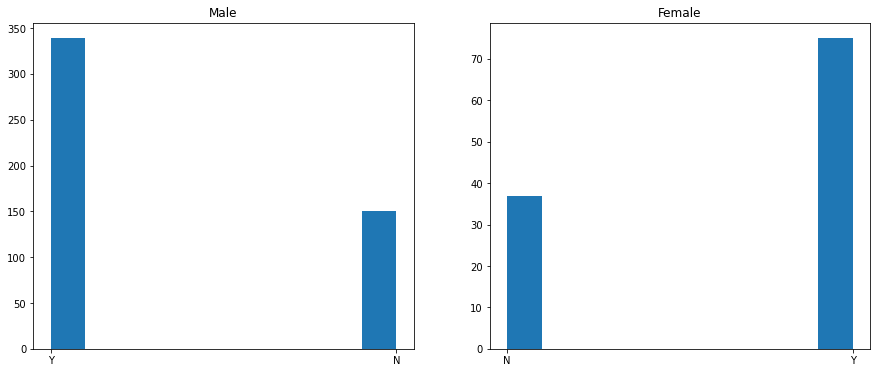

positive loan decision ratio for male = 0.693
positive loan decision ratio for female = 0.670


In [12]:
#does gender matter in the loan decision?
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,6)

axs[0].hist(df_train_1[df_train_1["Gender"] == "Male"]["Loan_Status"])
axs[0].set_title("Male")

axs[1].hist(df_train_1[df_train_1["Gender"] == "Female"]["Loan_Status"])
axs[1].set_title("Female")
plt.show()

male_ratio = df_train_1[(df_train_1["Gender"] == "Male") & (df_train_1["Loan_Status"]=="Y")].shape[0]/\
df_train_1[df_train_1["Gender"] == "Male"].shape[0]
female_ratio = df_train_1[(df_train_1["Gender"] == "Female") & (df_train_1["Loan_Status"]=="Y")].shape[0]/\
df_train_1[df_train_1["Gender"] == "Female"].shape[0]

print(f"positive loan decision ratio for male = {male_ratio:.3f}")
print(f"positive loan decision ratio for female = {female_ratio:.3f}")

In [13]:
#deleting gender column because as we have seen above Gender isn't making difference in loan decision 
df_train_2 = df_train_1.drop("Gender", axis=1)
df_test_2= df_test_1.drop("Gender", axis=1)

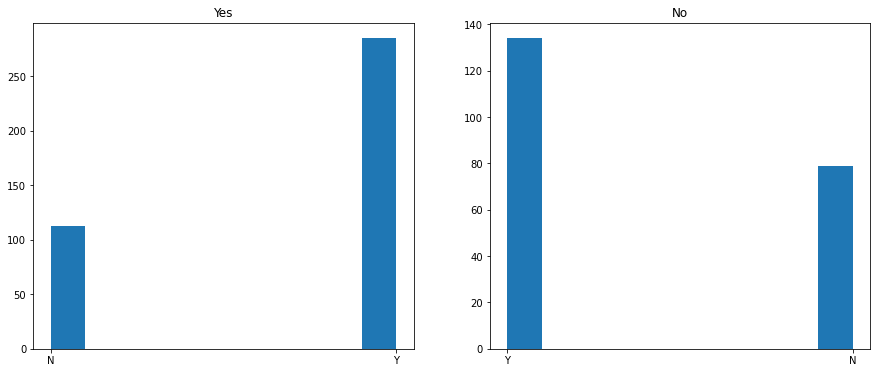

positive loan decision ratio for married = 0.716
positive loan decision ratio for not married = 0.629


In [14]:
#does MArried matter in the loan decision?
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,6)

axs[0].hist(df_train_2[df_train_2["Married"] == "Yes"]["Loan_Status"])
axs[0].set_title("Yes")

axs[1].hist(df_train_2[df_train_2["Married"] == "No"]["Loan_Status"])
axs[1].set_title("No")
plt.show()

yes_ratio = df_train_2[(df_train_2["Married"] == "Yes") & (df_train_2["Loan_Status"]=="Y")].shape[0]/\
df_train_2[df_train_2["Married"] == "Yes"].shape[0]
no_ratio = df_train_2[(df_train_2["Married"] == "No") & (df_train_2["Loan_Status"]=="Y")].shape[0]/\
df_train_2[df_train_2["Married"] == "No"].shape[0]

print(f"positive loan decision ratio for married = {yes_ratio:.3f}")
print(f"positive loan decision ratio for not married = {no_ratio:.3f}")

In [15]:
#there is actually small diffrence in loan decision between married and not married:this column cannot be deleted
#all other columns are at this moment important in my opinion

In [16]:
df_train_2

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## dealing with missing values

In [17]:
df_train_2.isnull().sum()

Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#first step would be dealing with missing numeric columns 
#good first option could be just replace it with median 

imputer = SimpleImputer(strategy="median")
def fill_numeric(df, columns, train=True):
    df_numeric = df[columns]
    if train:
        X= imputer.fit_transform(df_numeric)
        return pd.DataFrame(X, columns=df_numeric.columns, index=df_numeric.index)
    else:
        X = imputer.transform(df_numeric)
        return pd.DataFrame(X, columns=df_numeric.columns, index=df_numeric.index)

In [19]:
df_train_numeric = fill_numeric(df_train_2, ["ApplicantIncome", "CoapplicantIncome", "LoanAmount",  "Loan_Amount_Term"])
df_test_numeric =  fill_numeric(df_test_2, ["ApplicantIncome", "CoapplicantIncome", "LoanAmount",  "Loan_Amount_Term"], train =False)
df_train_numeric.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [20]:
#dealing with missing categorical columns 
#good first option could be just replace it with mode value in each feature
df_train_categorical = df_train_2.drop(df_train_numeric.columns, axis=1)
df_train_categorical = df_train_categorical.fillna(df_train_categorical.mode().iloc[0])
df_train_categorical.isnull().sum()

Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [21]:
df_test_categorical = df_test_2.drop(df_test_numeric.columns, axis=1)
df_test_categorical = df_test_categorical.fillna(df_train_categorical.mode().iloc[0])
df_test_categorical.isnull().sum()

Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
dtype: int64

## encoding data 

In [22]:
#categorical data encoding automatically
auto_encoder = OrdinalEncoder()

#categorical data encoding manually
def manual_encoder(array, labels):
    return list(map(labels.index, array))

In [23]:
#columns with two categories could be automatically encoded
df_train_categorical_encoded = df_train_categorical
df_test_categorical_encoded  = df_test_categorical

df_train_categorical_encoded[["Married", "Education", "Self_Employed"]] = auto_encoder.fit_transform(df_train_categorical[["Married", "Education", "Self_Employed"]]) 
df_test_categorical_encoded[["Married", "Education", "Self_Employed"]] = auto_encoder.transform(df_test_categorical[["Married", "Education", "Self_Employed"]]) 
df_train_categorical_encoded["Loan_Status"] = auto_encoder.fit_transform(df_train_categorical[["Loan_Status"]])


In [24]:
df_train_categorical_encoded

,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0.0,0,0.0,0.0,1.0,Urban,1.0
1,1.0,1,0.0,0.0,1.0,Rural,0.0
2,1.0,0,0.0,1.0,1.0,Urban,1.0
3,1.0,0,1.0,0.0,1.0,Urban,1.0
4,0.0,0,0.0,0.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...
609,0.0,0,0.0,0.0,1.0,Rural,1.0
610,1.0,3+,0.0,0.0,1.0,Rural,1.0
611,1.0,1,0.0,0.0,1.0,Urban,1.0
612,1.0,2,0.0,0.0,1.0,Urban,1.0


In [25]:
#I encoded columns with more than two categories manually, because I predict mathematical relationship
#end each category should be in appropriate order
df_train_categorical_encoded["Dependents"] = manual_encoder(df_train_categorical["Dependents"], ["0", "1", "2", "3+"])
df_test_categorical_encoded["Dependents"] = manual_encoder(df_test_categorical["Dependents"], ["0", "1", "2", "3+"])
df_train_categorical_encoded["Property_Area"] = manual_encoder(df_train_categorical["Property_Area"], ["Rural","Semiurban", "Urban"])
df_test_categorical_encoded["Property_Area"] = manual_encoder(df_test_categorical["Property_Area"], ["Rural","Semiurban", "Urban"])


In [26]:
df_train_categorical_encoded

,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0.0,0,0.0,0.0,1.0,2,1.0
1,1.0,1,0.0,0.0,1.0,0,0.0
2,1.0,0,0.0,1.0,1.0,2,1.0
3,1.0,0,1.0,0.0,1.0,2,1.0
4,0.0,0,0.0,0.0,1.0,2,1.0
...,...,...,...,...,...,...,...
609,0.0,0,0.0,0.0,1.0,0,1.0
610,1.0,3,0.0,0.0,1.0,0,1.0
611,1.0,1,0.0,0.0,1.0,2,1.0
612,1.0,2,0.0,0.0,1.0,2,1.0


In [27]:
df_train_final = pd.concat([df_train_numeric, df_train_categorical_encoded], axis=1)
df_test_final = pd.concat([df_test_numeric, df_test_categorical_encoded], axis=1)

In [28]:
df_train_final

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,0.0,0,0.0,0.0,1.0,2,1.0
1,4583.0,1508.0,128.0,360.0,1.0,1,0.0,0.0,1.0,0,0.0
2,3000.0,0.0,66.0,360.0,1.0,0,0.0,1.0,1.0,2,1.0
3,2583.0,2358.0,120.0,360.0,1.0,0,1.0,0.0,1.0,2,1.0
4,6000.0,0.0,141.0,360.0,0.0,0,0.0,0.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,0.0,0,0.0,0.0,1.0,0,1.0
610,4106.0,0.0,40.0,180.0,1.0,3,0.0,0.0,1.0,0,1.0
611,8072.0,240.0,253.0,360.0,1.0,1,0.0,0.0,1.0,2,1.0
612,7583.0,0.0,187.0,360.0,1.0,2,0.0,0.0,1.0,2,1.0


## building the model

In [71]:
#making pipeline to optimize model building
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", KNeighborsClassifier()),
])

params_1 = {}
params_1["scaler"] = [StandardScaler(), MinMaxScaler(), PowerTransformer(), Normalizer()]
params_1["classifier__n_neighbors"] = [17,21,25,27]
params_1["classifier"] = [KNeighborsClassifier()]

params_2 = {}
params_2["scaler"] = [StandardScaler(), MinMaxScaler(), PowerTransformer(), Normalizer()]
params_2["classifier"] = [RandomForestClassifier()]
params_2["classifier__n_estimators"] = [200, 210, 220, 230, 240, 250]

params_3 = {}
params_3["scaler"] = [StandardScaler(), MinMaxScaler(), PowerTransformer(), Normalizer()]
params_3["classifier"] = [LogisticRegression()]

params_4 = {}
params_4["scaler"] = [StandardScaler(), MinMaxScaler(), PowerTransformer(), Normalizer()]
params_4["classifier"] = [SVC()]
params_4["classifier__kernel"] = ["linear", "poly", "rbf", "sigmoid"]



params = [params_1, params_2, params_3, params_4]
grid_1 = GridSearchCV(pipeline, params, cv=3, scoring='roc_auc')

In [64]:
X = df_train_final.drop(["Loan_Status"], axis=1)
y = df_train_final["Loan_Status"]

In [72]:
grid_1.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [17, 21, 25, 27],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     PowerTransformer(), Normalizer()]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__n_estimators': [25...
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     PowerTransformer(), Normalizer()]},
                         {'classifier': [LogisticRegression()],
                          'scaler': [StandardScaler(), MinMaxScaler(),
                                     PowerTransformer(), Normalizer()]},
                         {'classifier': [SVC()],
                    

In [73]:
evaluation = pd.DataFrame(data=grid_1.cv_results_)
evaluation

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__n_neighbors,param_scaler,param_classifier__n_estimators,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007532,0.002791,0.009195,0.000833,KNeighborsClassifier(),17,StandardScaler(),NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.745013,0.737977,0.769085,0.750692,0.013320,20
1,0.002687,0.003800,0.007719,0.003134,KNeighborsClassifier(),17,MinMaxScaler(),NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.707114,0.719969,0.764900,0.730661,0.024773,28
2,0.025784,0.001837,0.003033,0.003528,KNeighborsClassifier(),17,PowerTransformer(),NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.735095,0.716534,0.736217,0.729282,0.009026,29
3,0.008021,0.000038,0.000000,0.000000,KNeighborsClassifier(),17,Normalizer(),NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.574246,0.546376,0.507645,0.542756,0.027310,47
4,0.008798,0.000691,0.000584,0.000826,KNeighborsClassifier(),21,StandardScaler(),NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.737367,0.751773,0.753627,0.747589,0.007268,22
5,0.002627,0.003716,0.008007,0.000076,KNeighborsClassifier(),21,MinMaxScaler(),NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.707558,0.737644,0.766350,0.737184,0.024004,26
6,0.024266,0.003562,0.003845,0.001837,KNeighborsClassifier(),21,PowerTransformer(),NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.727449,0.719637,0.738951,0.728679,0.007933,30
7,0.004324,0.003334,0.004929,0.003747,KNeighborsClassifier(),21,Normalizer(),NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.559563,0.537012,0.522042,0.539539,0.015422,48
8,0.006655,0.004735,0.003656,0.004986,KNeighborsClassifier(),25,StandardScaler(),NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.739971,0.740082,0.749554,0.743202,0.004491,23
9,0.008022,0.002017,0.001693,0.002189,KNeighborsClassifier(),25,MinMaxScaler(),NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.707391,0.738697,0.781808,0.742632,0.030508,24


In [80]:
#it seems we found the best model :
print(f"best estimator: {grid.best_estimator_}")
print(f"best params: {grid.best_params_}")
print(f"best accuracy: {grid.best_score_: .3f}%")


best estimator: Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])
best params: {'classifier': SVC(), 'scaler': StandardScaler()}
best accuracy:  0.773%


### model evaluation

In [82]:
y_pred = best_estimator.predict(X)
print("model evaluation:")
print(f"AUC={grid.best_score_: .4f}")
print(f"precision={precision_score(y,y_pred): .4f}")
print(f"recall={recall_score(y,y_pred): .4f}")
confusion_matrix(y, y_pred)

model evaluation:
AUC= 0.7734
precision= 0.8031
recall= 0.9858


array([[ 90, 102],
       [  6, 416]], dtype=int64)